<a href="https://colab.research.google.com/github/sunanda-debnath/EDA-PLAYSTORE-APP/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

I did my best to follow a comprehensive, but not exhaustive, analysis of the data. I'm far from reporting a rigorous study in this kernel, but I hope that it can be useful for the community, so I'm sharing how I applied some of those data analysis principles to this problem.

I gave to the chapters, what we are doing in this kernel is something like:

*   **loading the data into data frame**.
*   **Basic cleaning**. 
*   **exploratory analysis and visualizations**
*   **questions that can be asked from the visulization**
*   **conclution**























# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ eda project 1/playstore original/Play Store Data.csv")
df_new = df.copy() #for not tampering the original data

# Data Overview

In [ ]:
print(df_new.shape)
df_new.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


###All features are object data type except rating

# Checking what columns are there in the dataset

In [ ]:
df_new.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Descriptive statistics

In [ ]:
df_new.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df_new['App'].duplicated().value_counts()

False    9660
True     1181
Name: App, dtype: int64

In [ ]:
df_new.loc[df_new['App'].duplicated()] #no of duplicates

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


### Droping the duplicates

In [ ]:
df_new = df_new.drop_duplicates('App') 

In [ ]:
df_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


###Find null values

In [ ]:
df_new.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
#For minimize the lossing data we fill the null values in (Rating) column by mean through catagory wise.
df_new['Rating'].fillna(df_new.groupby('Category')['Rating'].transform('mean'),inplace=True)

In [ ]:
df_new.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

###Dropping other null rows

In [ ]:
df_new.dropna(inplace=True)

## correcting the data types
### Which all variables need to be brought to numeric types?
### Installs
### size
### Reviews
### Price

### Convert the 'Installs' column to int type

In [ ]:
df_new['Installs'] = df_new['Installs'].apply(lambda x:x .replace('+',''))     #replacing '+' sign from each intalls values 
df_new['Installs'] = df_new['Installs'].apply(lambda x:x .replace(',',''))
df_new['Installs'] = df_new['Installs'].astype(int)


###Convert 'Size' column to float type and all values in Megabytes 

In [ ]:
#replacing the string 'Varies with device' into NaN value and leter filled by mean value catagory wise
df_new['Size'].replace('Varies with device', np.nan, inplace = True)
df_new['Size'] =df_new['Size'].apply(lambda x:str(x).replace('M',''))
df_new['Size'] =df_new['Size'].apply(lambda x:str(x).replace('k','e-3')) #replace k(kilobytes) to megabytes
df_new['Size'] =df_new['Size'].astype(float) #convert to float
df_new['Size'].fillna(df_new.groupby('Category')['Size'].transform('mean'),inplace = True) #fill NaN values with mean of the size of the apps by its category respectively

In [ ]:
df_new['Size'].unique() #unique values in 'Size' column

array([1.90000000e+01, 1.40000000e+01, 8.70000000e+00, 2.50000000e+01,
       2.80000000e+00, 5.60000000e+00, 2.90000000e+01, 3.30000000e+01,
       3.10000000e+00, 2.80000000e+01, 1.20000000e+01, 2.00000000e+01,
       2.10000000e+01, 3.70000000e+01, 5.50000000e+00, 1.70000000e+01,
       3.90000000e+01, 3.10000000e+01, 4.20000000e+00, 7.00000000e+00,
       2.30000000e+01, 6.00000000e+00, 6.10000000e+00, 4.60000000e+00,
       9.20000000e+00, 5.20000000e+00, 1.10000000e+01, 2.40000000e+01,
       1.25295082e+01, 9.40000000e+00, 1.50000000e+01, 1.00000000e+01,
       1.20000000e+00, 2.60000000e+01, 8.00000000e+00, 7.90000000e+00,
       5.60000000e+01, 5.70000000e+01, 2.00371467e+01, 3.50000000e+01,
       5.40000000e+01, 2.01000000e-01, 3.60000000e+00, 5.70000000e+00,
       8.60000000e+00, 2.40000000e+00, 2.70000000e+01, 2.70000000e+00,
       2.50000000e+00, 1.60000000e+01, 3.40000000e+00, 8.90000000e+00,
       3.90000000e+00, 2.90000000e+00, 3.80000000e+01, 3.20000000e+01,
      

###Convert Price column object to number type

In [ ]:
df_new['Price']=df_new['Price'].apply(lambda x:x.replace('$',''))
df_new['Price']=df_new['Price'].astype(float)

###Convert Reviews column to numaric

In [ ]:
df_new['Reviews'] =df_new['Reviews'].astype(int)

# Sanity cheak
##1.Avg rating should be between 1 and 5,only these values are allowed on the playstore.
###Are there any such records?drop if so

In [ ]:
(df_new['Rating']<1).sum()

0

In [ ]:
(df_new['Rating']>5).sum()

0

##2.Reviews should not be more than installs as only those who installed can review the app
###Are there any such records? Drop if so.

In [ ]:
df_new[df_new['Reviews'] > df_new['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.000000,4,25.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,4.179664,4,64.000000,1,Free,0.00,Everyone,Education,"July 17, 2018",1.0.1,4.4 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.800000,10249,14.844916,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5812,AX Watch for WatchMaker,PERSONALIZATION,4.332215,2,0.238000,1,Paid,0.99,Everyone,Personalization,"August 18, 2017",1.0,2.3 and up
5917,Ra Ga Ba,GAME,5.000000,2,20.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6508,Sam.BN Pro,TOOLS,4.039554,11,2.000000,10,Paid,0.99,Everyone,Tools,"March 27, 2015",1.0.0,4.0.3 and up
6700,Brick Breaker BR,GAME,5.000000,7,19.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.000000,11,6.100000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.000000,20,4.200000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
9096,DZ Puzzle,FAMILY,4.179664,14,47.000000,10,Paid,0.99,Everyone,Puzzle,"April 22, 2017",1.2,2.3 and up


In [ ]:
df_new.drop(df_new[df_new['Reviews']>df_new['Installs']].index,inplace=True) #droping 
df_new[df_new['Reviews'] > df_new['Installs']] #cheaking the output

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9637 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9637 non-null   object 
 1   Category        9637 non-null   object 
 2   Rating          9637 non-null   float64
 3   Reviews         9637 non-null   int64  
 4   Size            9637 non-null   float64
 5   Installs        9637 non-null   int64  
 6   Type            9637 non-null   object 
 7   Price           9637 non-null   float64
 8   Content Rating  9637 non-null   object 
 9   Genres          9637 non-null   object 
 10  Last Updated    9637 non-null   object 
 11  Current Ver     9637 non-null   object 
 12  Android Ver     9637 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


# Data Visulisation for Basic EDA
###1.App size

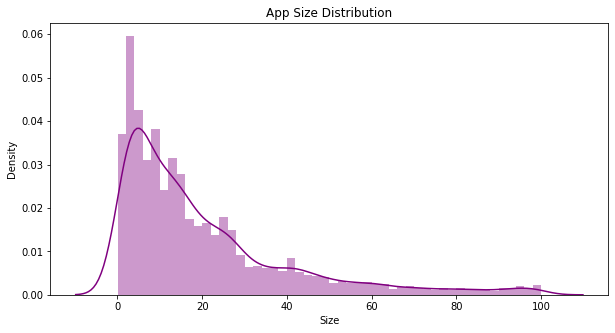

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df_new['Size'],color='purple')
plt.title('App Size Distribution')
plt.show()

In [ ]:
#Most of the apps size lie in 0 to 20 mb range
(df_new[df_new['Size']<=20].shape[0]/df_new['Size'].shape[0])*100   # % of the apps size less or equal than to 20 mb

64.97872781986095

approx 65% of the apps come under 0 to 20 mb in in size 

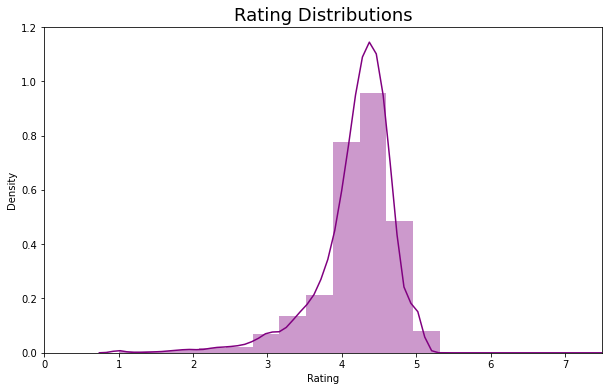

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Rating Distributions',size = 18)
sns.distplot(df['Rating'],color='purple')
plt.xlim(0,7.5)
plt.show()

Maximum of the apps are rated around 4 to 4.5

###2.Relationship Analysis

In [ ]:
df_new.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.055304,0.057262,0.040464,-0.019678
Reviews,0.055304,1.000000,0.075486,0.625151,-0.007607
Size,0.057262,0.075486,1.000000,0.040682,-0.021618
Installs,0.040464,0.625151,0.040682,1.000000,-0.009417
Price,-0.019678,-0.007607,-0.021618,-0.009417,1.000000


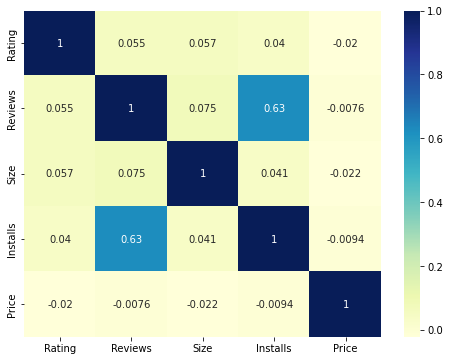

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df_new.corr(),cmap="YlGnBu",annot=True)
plt.show()

Most of them columns are correlated negatively with Price column

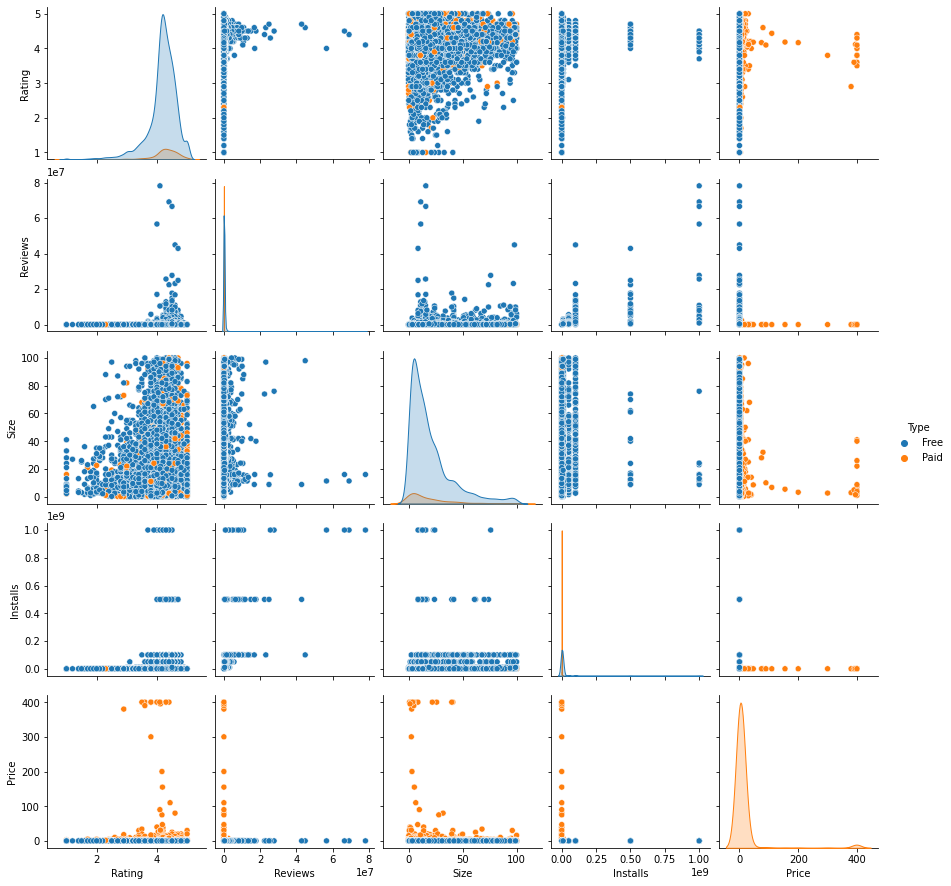

In [ ]:
sns.pairplot(df_new,hue='Type')

###3.Corelations in Genres and Installs with types

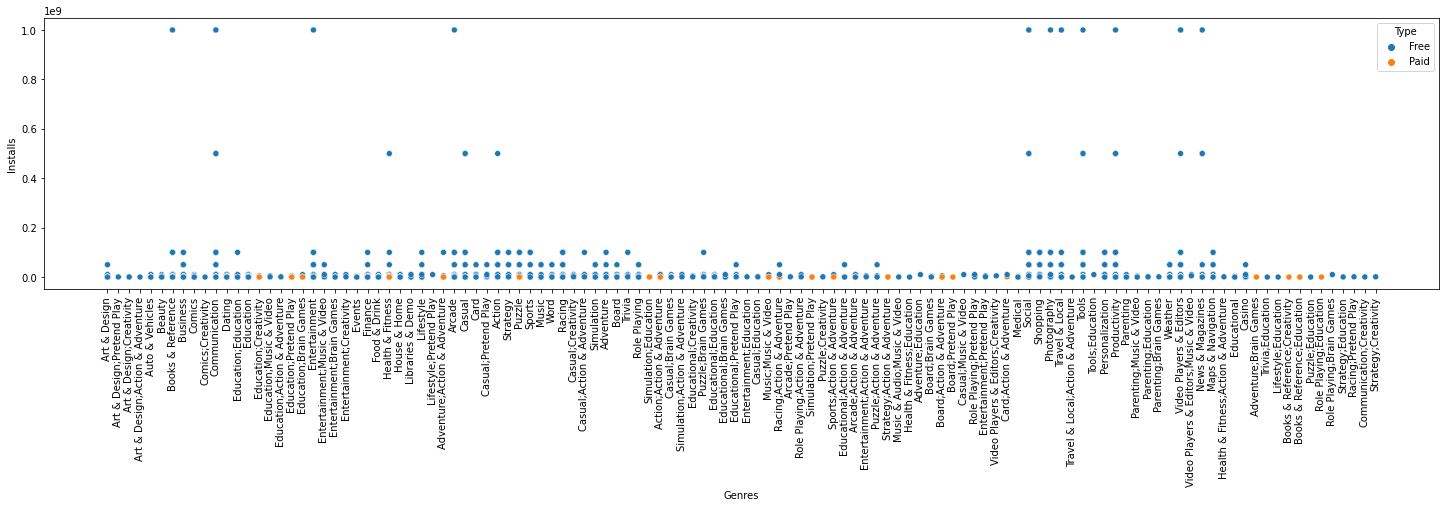

In [ ]:
plt.figure(figsize=(25,5))
sns.scatterplot(df_new['Genres'], df_new['Installs'],hue=df_new['Type']) 
plt.xticks(rotation=90)
plt.show()

###4.Paid app price distribution with catagory wise

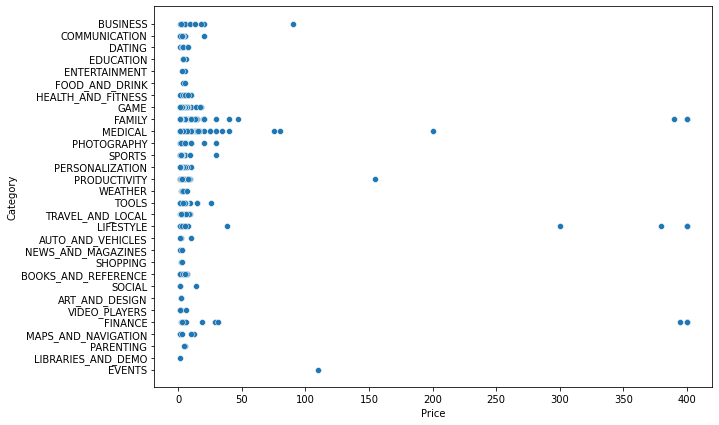

In [ ]:
paid_apps = df_new[df_new['Type']=='Paid']
plt.figure(figsize=(10,7))
sns.scatterplot(data=paid_apps,y='Category',x='Price')
plt.show()

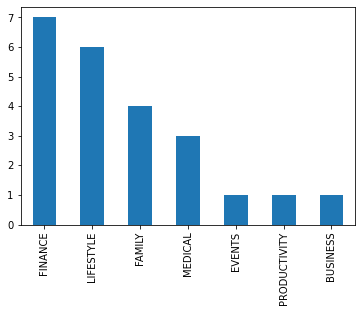

In [ ]:
paid_apps[paid_apps['Price']>=50]['Category'].value_counts().plot(kind='bar') #Apps price above 50$

Most of the apps in paid section are Family and Medical.

###5.Total Number of Apps based on Type (Paid/Free).

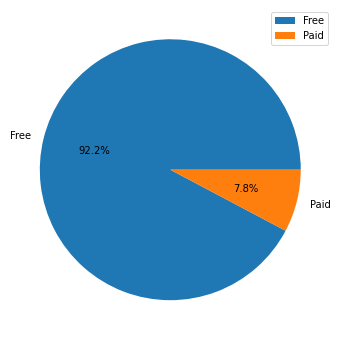

In [ ]:
labels =df_new['Type'].value_counts(sort = True).index
plt.figure(figsize=(6,6))
plt.pie(df_new['Type'].value_counts(),labels=labels,autopct='%1.1f%%')
plt.legend()
plt.show()

### 6.Rating vs content rating

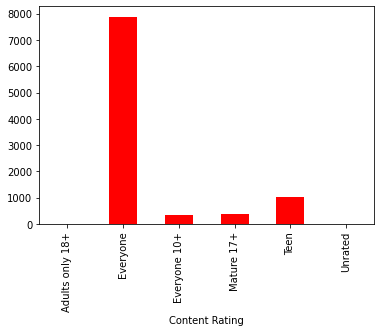

In [ ]:
df_new.groupby(['Content Rating'])['Rating'].count().plot.bar(color="red")

###7.Corelation of size on rating

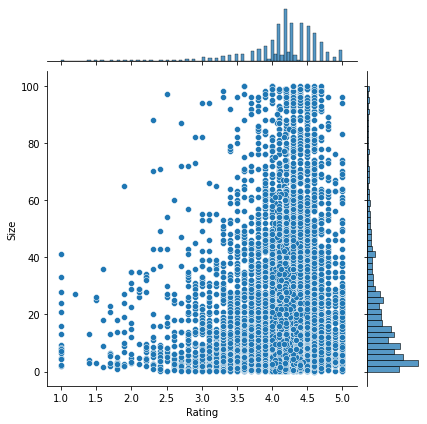

In [ ]:
sns.jointplot(data=df_new,y='Size',x='Rating')

co-relation between Size,Rating,There is increase in rating when there is increse in Size,but for as the size incresed there is constant ratings.


#Conclusion:
The objective of this Play store Data analysis is to know how different parameters can affect the app ratings and reviews and understand how these can impact the Play store app industry as a whole. So we can conclude that:

1.Users mostly prefer the free apps. App size does not affect the decision of   using the paid or free apps much.

The apps which have the higher rating above 4 are targeting all the people and not a certain age group.

On average the application size is in between 10 MB to 20 MB.
Family & Medical category Apps have the highest earning.
Also at the same time Medical, Family, Tools, Game category apps are the most expensive apps which is clearly visible because these categories of the application market have the most invested money and indeed these are the right categories to make best profits.
Customer ratings actually effect the category to release an app in that category.
We can see that most positive sentiment reviews are from most polupar categories.
Positive reviews are higher than negative and neutral sentiment reviews.


# **The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.**
# **Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.**
# **Explore and analyze the data to discover key factors responsible for app engagement and success.**

I did my best to follow a comprehensive, but not exhaustive, analysis of the data. I'm far from reporting a rigorous study in this kernel, but I hope that it can be useful for the community, so I'm sharing how I applied some of those data analysis principles to this problem.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [ ]:
playdf = pd.read_csv("/content/drive/MyDrive/ eda project 1/playstore original/Play Store Data.csv")

## Checking what columns are there in the dataset

In [ ]:
playdf.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## Data Overview

In [ ]:
playdf.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Descriptive statistics

In [ ]:
playdf.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
playdf.describe(include='O').T

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


In [ ]:
playdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


###All features are object data type except rating

## Converting Rating,Reviews,Size,Installs and Price columns into 'int' dtype 

In [ ]:
playdf.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

'Rating' contains 1474 null values 

In [ ]:
playdf['App'].duplicated().value_counts()

False    9660
True     1181
Name: App, dtype: int64

1181 Apps are duplicated entries in the dataset

# **Data Cleaning**

## Droping the duplicates

In [ ]:
playdf=playdf.drop_duplicates('App')

In [ ]:
playdf.shape

(9660, 13)

All duplicates values are removed from 'App' column

In [ ]:
playdf.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
#For minimize the lossing data we fill the null values in (Rating) column by mean through catagory wise.
playdf['Rating'].fillna(playdf.groupby('Category')['Rating'].transform('mean'),inplace=True)     

In [ ]:
playdf.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

###Dropping other null rows

In [ ]:
playdf.dropna(inplace=True)

In [ ]:
playdf.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## correcting the data types
### Which all variables need to be brought to numeric types?
### Installs
### size
### Reviews
### Price


### Convert Reviews column to numaric

In [ ]:
playdf['Reviews']=playdf['Reviews'].astype(int)                   # converting into int dtype

In [ ]:
playdf['Reviews'].dtype

dtype('int64')

###Convert 'Size' column to float type and all values in Megabytes 



In [ ]:
playdf['Size'].unique()                              # Values contains M or k at the end as Megabytes or kilobytes resp.
                                                     #Some value contains 'Varies with devices' '

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
playdf['Size'].replace('Varies with device',np.nan, inplace=True)             # converting 'Varies with device' value to Null value

In [ ]:
playdf['Size']=playdf['Size'].apply(lambda x:str(x).replace('M',''))
playdf['Size']=playdf['Size'].apply(lambda x:str(x).replace('k','e-3'))       # replacing k(kilobytes) into Megabytes format 

In [ ]:
playdf['Size'].shape

(9648,)

In [ ]:
playdf['Size']=playdf['Size'].astype(float)

In [ ]:
playdf['Size'].dtype

dtype('float64')

In [ ]:
playdf['Size'].fillna(playdf.groupby('Category')['Size'].transform('mean'), inplace=True)

Conversion of 'Installs' column from object dtype to numerical dtype

In [ ]:
playdf['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9648, dtype: object

In [ ]:
playdf['Installs']=playdf['Installs'].apply(lambda x:x.replace('+',''))
playdf['Installs']=playdf['Installs'].apply(lambda x:x.replace(',',''))

In [ ]:
playdf['Installs']=playdf['Installs'].astype(int)                   # converting into int dtype

In [ ]:
playdf['Installs'].dtype

dtype('int64')

In [ ]:
#Removing rows in which Reviews is greater than Installs. 

conditions = [    playdf['Reviews']>playdf['Installs'],                
                  playdf['Reviews']<=playdf['Installs']          ]

choice = ['Remove', 'Keep']

playdf['Decision'] = np.select(conditions, choice)

In [ ]:
playdf['Decision'].value_counts()

Keep      9637
Remove      11
Name: Decision, dtype: int64

In [ ]:
playdf.shape

(9648, 14)

In [ ]:
playdf['Price']=playdf['Price'].apply(lambda x:x.replace('$',''))         # converting dtype of 'Price' from object to numerical.

In [ ]:
playdf['Price'].astype(float)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9648, dtype: float64

In [ ]:
playdf['Price']=playdf['Price'].astype(float)


In [ ]:
playdf.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Decision          0
dtype: int64

In [ ]:
playdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
 13  Decision        9648 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


Now we have five numerical dtype columns such as 'Rating ,Reviews, Size, Installs and Price'


---



# Data Visulisation for Basic EDA

## Relationship Analysis

<Figure size 432x432 with 0 Axes>

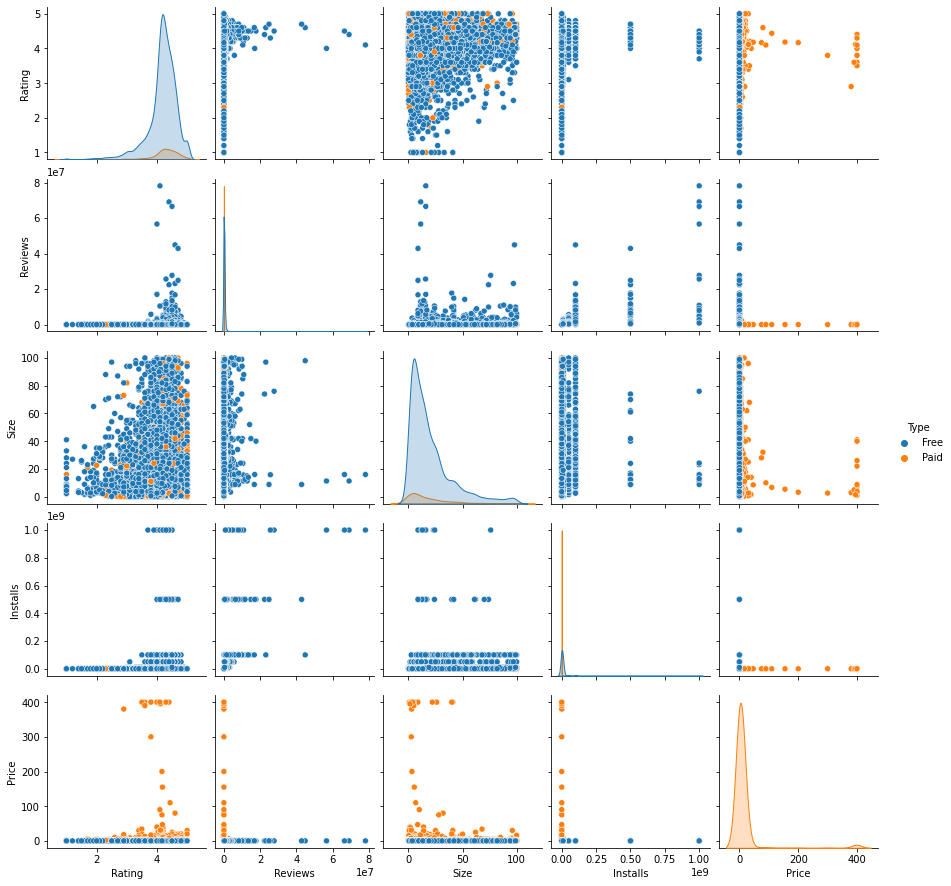

In [ ]:
plt.figure(figsize=(6,6))
sns.pairplot(playdf,hue="Type")

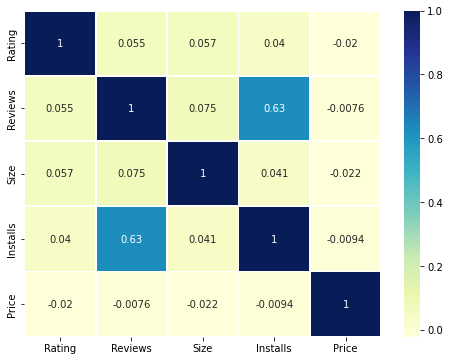

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(playdf.corr(),annot=True,linewidths=0.8,cmap="YlGnBu")
plt.show()

  What we got:

  1. We can see that 'Rating' and 'Reviews' are highly positive correlated.
  2. 'Installs' and 'Size' are also correlated positive.
  3. Most of the columns are negative correlated with 'Price' column

**Content Rating**

Everyone           7893
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64


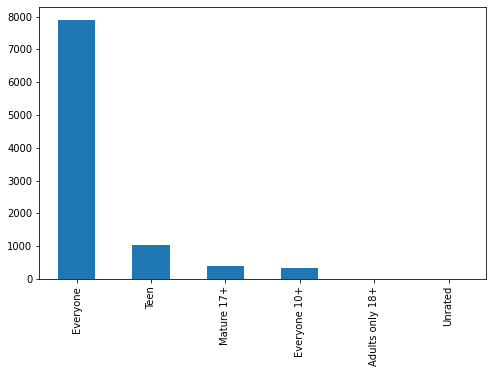

In [ ]:
plt.figure(figsize=(8,5))
playdf['Content Rating'].value_counts().plot(kind='bar')
print(playdf['Content Rating'].value_counts())

      Most of the apps are rated "Everyone".Only fews are rated for "Adults ony 18+" and "Unrated"

**Categories**

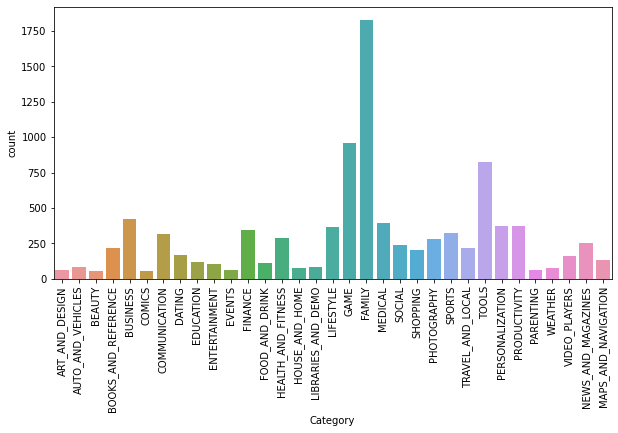

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(playdf['Category'])
plt.xticks(rotation=90)
plt.show()

Majority of the apps are in Family category

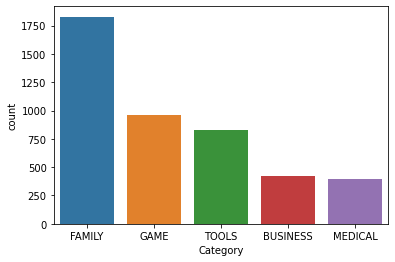

In [ ]:
sns.countplot(x=playdf['Category'],order=pd.value_counts(playdf['Category']).iloc[:5].index)

        Top 5 Categories are:

        1. Family
        2. Game
        3. Tools
        4. Business
        5. Medical

### Total Number of Apps based on Type (Paid/Free).

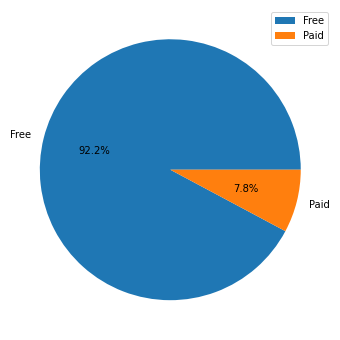

In [ ]:
labels=playdf['Type'].value_counts(sort=True).index
plt.figure(figsize=(6,6))
plt.pie(playdf['Type'].value_counts(),labels=labels,autopct='%1.1f%%')
plt.legend()
plt.show()

###Paid app price distribution with catagory wise 




In [ ]:
paid_apps=playdf[playdf['Type']=='Paid']

In [ ]:
playdf['Category']

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 9648, dtype: object

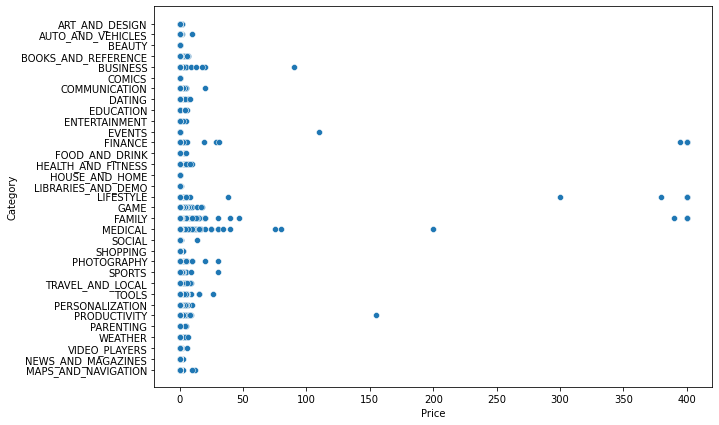

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=paid_apps,x=playdf['Price'],y=playdf['Category'])
plt.show()

    Family and Medical have the most paid apps.

In [ ]:
paid_apps['Price'].max()

400.0

In [ ]:
paid_apps[paid_apps['Price']==400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Decision
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,Keep


    The 'I'm Rich - Trump Edition' app is found to be the highest paid app.

In [ ]:
paid_apps['Installs'].max()

10000000

In [ ]:
paid_apps[paid_apps['Installs']==10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Decision
2241,Minecraft,FAMILY,4.5,2376564,27.222893,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,Keep
4034,Hitman Sniper,GAME,4.6,408292,29.000000,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,Keep


    Minecraft and Hitman Sniper are the most downloaded paid apps 

**Rating**

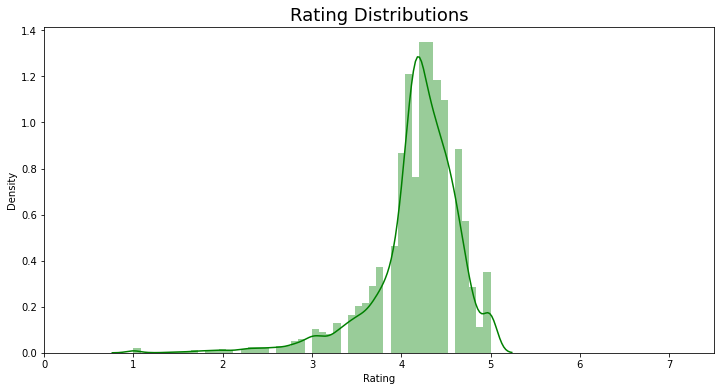

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Rating Distributions',size = 18)
sns.distplot(playdf['Rating'],color='green')
plt.xlim(0,7.5)
plt.show()

Maximum of the apps are rated around 4 to 4.5

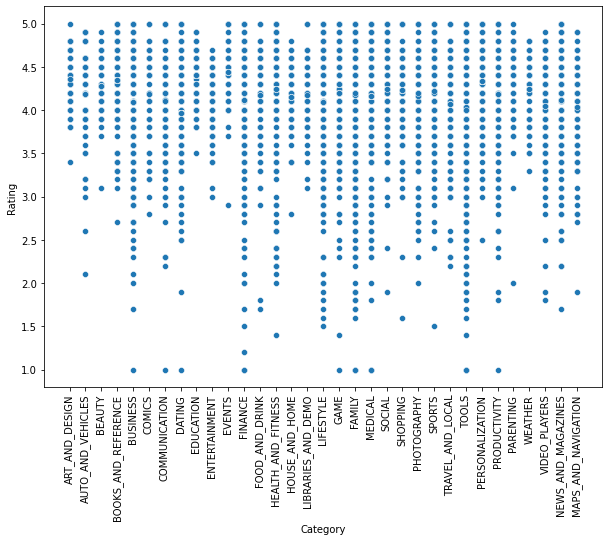

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=paid_apps,y=playdf['Rating'],x=playdf['Category'])
plt.xticks(rotation=90)
plt.show()

    Category wise rating donot differ much

**Top 5 Categories based on Ratings (min. 15,000 downloads)**

In [ ]:
apps_with_15k=playdf[playdf['Installs']>=15000]

In [ ]:
category_15k = apps_with_15k.groupby(['Category'])

In [ ]:
category_15k['Rating'].mean().sort_values(ascending=False).iloc[:5]

Category
BOOKS_AND_REFERENCE    4.396930
EDUCATION              4.367539
PARENTING              4.364103
HEALTH_AND_FITNESS     4.356757
PERSONALIZATION        4.326660
Name: Rating, dtype: float64

    So Top 5 Category based on ratings and having minimum 15k downloads are as shown above

**Genres**

In [ ]:
playdf['Genres'].nunique()

118

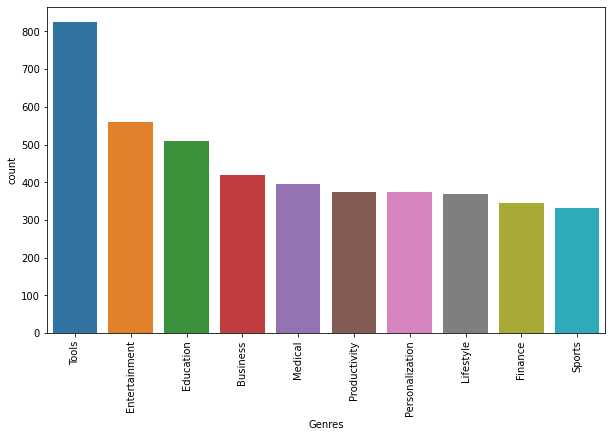

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=playdf['Genres'],order=pd.value_counts(playdf['Genres']).iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

    Most frequent genres are Tools,Entertainment,Education

In [ ]:
gen_15k=apps_with_15k.groupby(['Genres'])

In [ ]:
gen_15k['Rating'].mean().sort_values(ascending=False).iloc[:5]

Genres
Comics;Creativity              4.8
Health & Fitness;Education     4.7
Puzzle;Education               4.6
Adventure;Brain Games          4.6
Strategy;Action & Adventure    4.6
Name: Rating, dtype: float64

    Comics;Creativity is the highest rated genre followed by Health & Fitness;Education and Books & Reference

**Android Version**

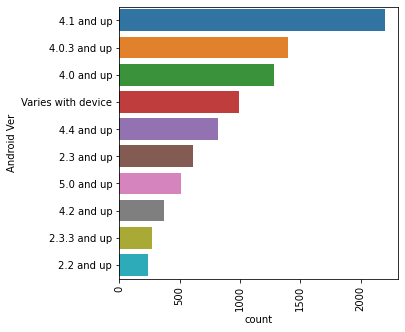

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(y=playdf['Android Ver'],order=pd.value_counts(playdf['Android Ver']).iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

    Most of the apps are made compatible with Android version 4(Jellybean) and above

**App Size**

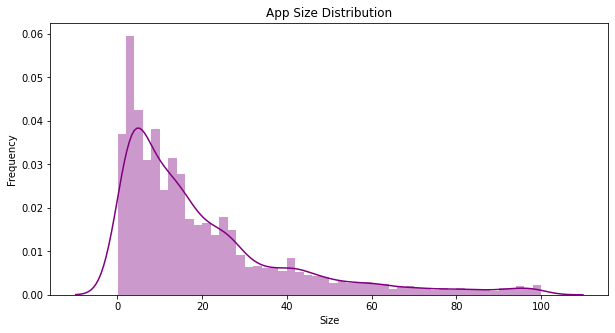

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(playdf['Size'],color='purple')
plt.title('App Size Distribution')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Many of the apps lie in 0-20 mb range
(playdf[playdf['Size']<=20].shape[0]/playdf['Size'].shape[0])*100   #Percentage calculation less than or equal to 20mb

64.98756218905473

    Almost 65% of apps's size lies between 0-20 Mb

**Top Categories based on Installs(having maximum Installs and ratings)**

In [ ]:
playdf['Installs'].max()

1000000000

In [ ]:
most_installs=playdf[playdf['Installs']==1000000000] 

In [ ]:
cat_download=most_installs.groupby(['Category'])

In [ ]:
cat_download['Rating'].mean().sort_values(ascending=False).iloc[:5]

Category
GAME             4.5
PHOTOGRAPHY      4.5
PRODUCTIVITY     4.4
TOOLS            4.4
ENTERTAINMENT    4.3
Name: Rating, dtype: float64

This are the Top 5 Category with maximun download and high rating

# **User Reviews Sentiment Analysis**

In [ ]:
reviews_data=pd.read_csv('/content/drive/MyDrive/ eda project 1/playstore original/User Reviews.csv')

In [ ]:
reviews_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
reviews_data.isna().sum() #Many null values

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
((reviews_data.isna().sum()[1])/reviews_data.shape[0])*100 # ~42% null values in 3 columns

41.7886305311455

**Merging Data**

In [ ]:
df_merged = pd.merge(playdf, reviews_data, on = "App", how = "inner") #Merging both datasets on Apppl

In [ ]:
df_merged = df_merged.dropna(subset=['Translated_Review', 'Sentiment']) #Dropping null values

In [ ]:
df_merged.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Decision,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Keep,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Keep,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Keep,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Keep,I love colors inspyering,Positive,0.500,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Keep,I hate,Negative,-0.800,0.900000


**Sentiment Polarity Between Free and Paid Apps**

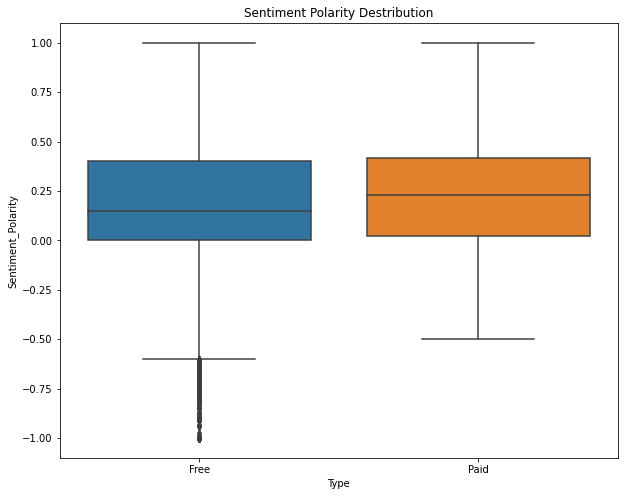

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Type', y='Sentiment_Polarity', data=df_merged)
plt.title('Sentiment Polarity Destribution')
plt.show()

    Free apps relatively recieve more negative comments(outliers on the negative Y-axis) than paid apps.

  

**WORKCLOUD**

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
#separating the merged data into negative and positive dataframe
negative_df = df_merged[df_merged['Sentiment']=='Negative'] 
postive_df = df_merged[df_merged['Sentiment']=='Positive']

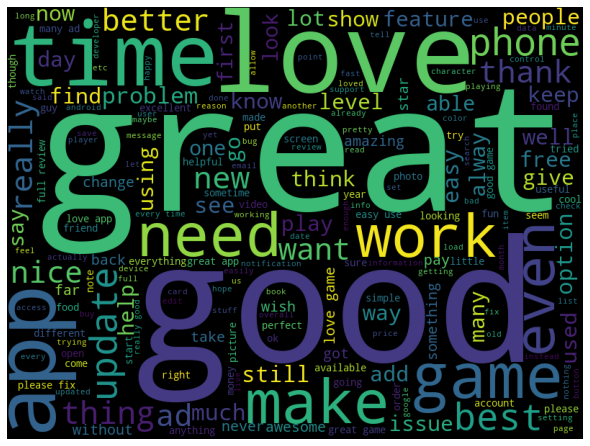

In [ ]:
#To generate wordcloud image fo positive reviews
words = ''
for s in postive_df['Translated_Review']:

    s = str(s) # typecaste each val to string
    x = s.split()# split the value
    
    for i in range(len(x)):# Converts each token into lowercase
        x[i] = x[i].lower()
     
    words = words + " ".join(x)+" "
 
wc = WordCloud(width = 800, height = 600,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
plt.figure(figsize = (8, 8))
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

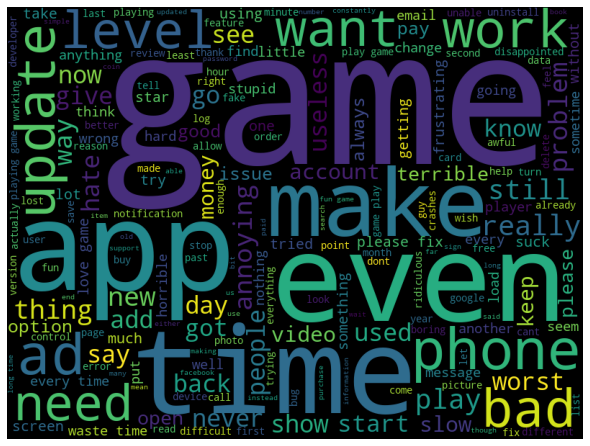

In [ ]:
#To generate wordcloud image for negative reviews
words = ''
for s in negative_df['Translated_Review']:

    s = str(s) # typecaste each val to string
    x = s.split()# split the value
    
    for i in range(len(x)):# Converts each token into lowercase
        x[i] = x[i].lower()
     
    words = words + " ".join(x)+" "
 
wc = WordCloud(width = 800, height = 600,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


**Positive Reviews**: "great, love, thank, good"      
**Negative Reviews**: "ad, update,hate,bad"

#Conclusion:
The objective of this Play store Data analysis is to know how different parameters can affect the app ratings and reviews and understand how these can impact the Play store app industry as a whole. So we can conclude that:

1.Users mostly prefer the free apps. App size does not affect the decision of   using the paid or free apps much.

The apps which have the higher rating above 4 are targeting all the people and not a certain age group.

On average the application size is in between 10 MB to 20 MB.
Family & Medical category Apps have the highest earning.
Also at the same time Medical, Family, Tools, Game category apps are the most expensive apps which is clearly visible because these categories of the application market have the most invested money and indeed these are the right categories to make best profits.
Customer ratings actually effect the category to release an app in that category.
We can see that most positive sentiment reviews are from most polupar categories.
Positive reviews are higher than negative and neutral sentiment reviews.